<a href="https://colab.research.google.com/github/amirbii/Classification_Models_Project/blob/main/CLF_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Library

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#Read Dataset

In [ ]:
df = pd.read_csv("Classification task _Train Dataset.csv")
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


#Overview of DataFrame

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


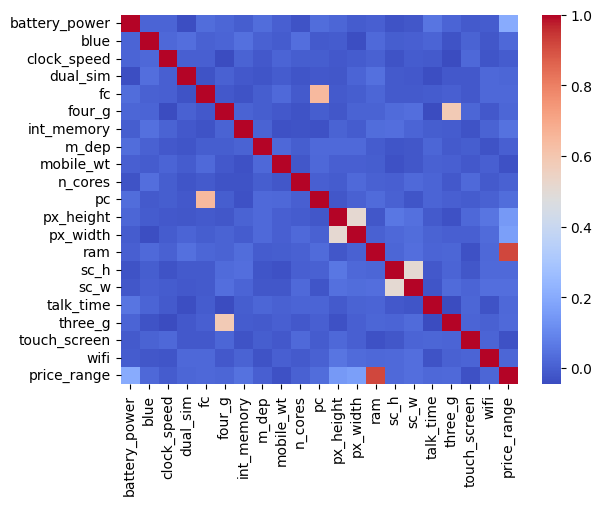

In [ ]:
sns.heatmap(df.corr(), cmap='coolwarm')
plt.show()

#train test split

In [ ]:
X = df.drop("price_range", axis=1)
y = df["price_range"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(y_train.value_counts(normalize=True))

price_range
1    0.25
0    0.25
3    0.25
2    0.25
Name: proportion, dtype: float64


#Data Normalization

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Logistic Regression

In [ ]:
params = [
    {"C": 1.0, "solver": "lbfgs"},
    {"C": 0.5, "solver": "liblinear"},
    {"C": 2.0, "solver": "saga"}
]

for p in params:
    clf_lr = LogisticRegression(max_iter=1000, **p)
    clf_lr.fit(X_train_scaled, y_train)
    y_pred = clf_lr.predict(X_test_scaled)

    print(f"\n Logistic Regression params {p}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))


 Logistic Regression params {'C': 1.0, 'solver': 'lbfgs'}
Accuracy: 0.965
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       100
           1       0.96      0.96      0.96       100
           2       0.95      0.94      0.94       100
           3       0.96      0.98      0.97       100

    accuracy                           0.96       400
   macro avg       0.97      0.96      0.96       400
weighted avg       0.97      0.96      0.96       400


 Logistic Regression params {'C': 0.5, 'solver': 'liblinear'}
Accuracy: 0.81
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       100
           1       0.73      0.61      0.66       100
           2       0.69      0.66      0.68       100
           3       0.88      0.99      0.93       100

    accuracy                           0.81       400
   macro avg       0.80      0.81      0.80       400
weighted avg       0.80      0.8

در این قسمت برای هر مدل سه پارامتر مختلف گذاشتیم تا به بهترین دقت برسیم و بهترین هایپر پارامتر ها رو پیدا کنیم در این قسمت برای اینکه هایپر پارامتر های مناسب پیشنهاد بشه از جی پی تی استفاده شده

#Decision Tree


In [ ]:
params = [
    {"criterion": "gini", "max_depth": 5},
    {"criterion": "entropy", "max_depth": 10},
    {"criterion": "gini", "max_depth": None}
]

for p in params:
    clf_dt = DecisionTreeClassifier(random_state=42, **p)
    clf_dt.fit(X_train, y_train)
    y_pred = clf_dt.predict(X_test)

    print(f"\n Decision Tree params {p}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))


 Decision Tree params {'criterion': 'gini', 'max_depth': 5}
Accuracy: 0.83
              precision    recall  f1-score   support

           0       0.94      0.89      0.91       100
           1       0.75      0.82      0.78       100
           2       0.74      0.75      0.75       100
           3       0.91      0.86      0.89       100

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400


 Decision Tree params {'criterion': 'entropy', 'max_depth': 10}
Accuracy: 0.88
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       100
           1       0.87      0.81      0.84       100
           2       0.82      0.80      0.81       100
           3       0.90      0.94      0.92       100

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      

#Random Forest


In [ ]:
params = [
    {"n_estimators": 100, "max_depth": 10},
    {"n_estimators": 200, "max_depth": 15},
    {"n_estimators": 300, "max_depth": None}
]

for p in params:
    rf = RandomForestClassifier(random_state=42, **p)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)

    print(f"\n Random Forest params {p}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))


 Random Forest params {'n_estimators': 100, 'max_depth': 10}
Accuracy: 0.89
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       100
           1       0.82      0.84      0.83       100
           2       0.84      0.82      0.83       100
           3       0.95      0.95      0.95       100

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400


 Random Forest params {'n_estimators': 200, 'max_depth': 15}
Accuracy: 0.89
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       100
           1       0.85      0.83      0.84       100
           2       0.84      0.81      0.82       100
           3       0.94      0.94      0.94       100

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.

#SVM

In [ ]:
params = [
    {"C": 1.0, "kernel": "linear"},
    {"C": 1.0, "kernel": "rbf"},
    {"C": 2.0, "kernel": "poly", "degree": 3}
]

for p in params:
    svm = SVC(**p)
    svm.fit(X_train_scaled, y_train)
    y_pred = svm.predict(X_test_scaled)

    print(f"\n SVM with params {p}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))



 SVM with params {'C': 1.0, 'kernel': 'linear'}
Accuracy: 0.9625
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       100
           1       0.95      0.95      0.95       100
           2       0.95      0.95      0.95       100
           3       0.96      0.99      0.98       100

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400


 SVM with params {'C': 1.0, 'kernel': 'rbf'}
Accuracy: 0.895
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       100
           1       0.87      0.87      0.87       100
           2       0.82      0.87      0.84       100
           3       0.94      0.90      0.92       100

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400


 

#KNN

In [ ]:
params = [
    {"n_neighbors": 3, "weights": "uniform"},
    {"n_neighbors": 5, "weights": "distance"},
    {"n_neighbors": 7, "weights": "uniform"}
]

for p in params:
    knn = KNeighborsClassifier(**p)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)

    print(f"\n KNN with params {p}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))


 KNN with params {'n_neighbors': 3, 'weights': 'uniform'}
Accuracy: 0.4725
              precision    recall  f1-score   support

           0       0.53      0.67      0.59       100
           1       0.33      0.43      0.37       100
           2       0.38      0.28      0.32       100
           3       0.72      0.51      0.60       100

    accuracy                           0.47       400
   macro avg       0.49      0.47      0.47       400
weighted avg       0.49      0.47      0.47       400


 KNN with params {'n_neighbors': 5, 'weights': 'distance'}
Accuracy: 0.505
              precision    recall  f1-score   support

           0       0.67      0.60      0.63       100
           1       0.34      0.35      0.34       100
           2       0.38      0.44      0.41       100
           3       0.68      0.63      0.66       100

    accuracy                           0.51       400
   macro avg       0.52      0.51      0.51       400
weighted avg       0.52      0.51

In [ ]:
results = []

clf_lr = LogisticRegression(max_iter=1000, C=1.0, solver="lbfgs")
clf_lr.fit(X_train_scaled, y_train)
y_pred = clf_lr.predict(X_test_scaled)
results.append(["Logistic Regression", "C=1.0, solver=lbfgs", accuracy_score(y_test, y_pred)])

clf_dt = DecisionTreeClassifier(criterion="entropy", max_depth=10, random_state=42)
clf_dt.fit(X_train, y_train)
y_pred = clf_dt.predict(X_test)
results.append(["Decision Tree", "entropy, max_depth=10", accuracy_score(y_test, y_pred)])

rf = RandomForestClassifier(n_estimators=200, max_depth=15, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
results.append(["Random Forest", "200 trees, max_depth=15", accuracy_score(y_test, y_pred)])

svm = SVC(C=1.0, kernel="rbf")
svm.fit(X_train_scaled, y_train)
y_pred = svm.predict(X_test_scaled)
results.append(["SVM", "C=1.0, kernel=rbf", accuracy_score(y_test, y_pred)])

knn = KNeighborsClassifier(n_neighbors=5, weights="distance")
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
results.append(["KNN", "k=5, weights=distance", accuracy_score(y_test, y_pred)])

df_results = pd.DataFrame(results, columns=["Model", "Best Params", "Accuracy"])
print(df_results)

                 Model              Best Params  Accuracy
0  Logistic Regression      C=1.0, solver=lbfgs     0.965
1        Decision Tree    entropy, max_depth=10     0.880
2        Random Forest  200 trees, max_depth=15     0.890
3                  SVM        C=1.0, kernel=rbf     0.895
4                  KNN    k=5, weights=distance     0.505


در این قسمت هر مدل با بهترین پارامترش نوشته شده تا مدل ها رو با توجه به دقت با هم مقایسه کنیم

برای رگرسیون لجستیک، ماشین بردار پشتیبان و نزدیک‌ترین همسایه از داده‌های استاندارد شده استفاده شده چون  به مقیاس به حساس هستن
برای فهمیدن این نکته هم از جی پی تی اسفاده شده

با توجه به دقت های به وجود امده رگرسیون لجستیک بهترین مدل و جنگل تصادفی و ماشین بردار پشتیبان مدل های خوبی  هستن برای اینکه روی دیتا تست امتحان کنیم انها رو برای لیبل گذاری

In [ ]:
df_test = pd.read_csv("Classification task _Test Dataset.csv")

X_test_final = df_test.drop("id", axis=1)

clf_lr = LogisticRegression(max_iter=1000, C=1.0, solver="lbfgs")
clf_lr.fit(X_train_scaled, y_train)
y_pred_clf_lr = clf_lr.predict(scaler.transform(X_test_final))
df_test["Predict_LR"] = y_pred_clf_lr

svm = SVC(C=1.0, kernel="rbf")
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(scaler.transform(X_test_final))
df_test["Predict_SVM"] = y_pred_svm

rf = RandomForestClassifier(n_estimators=200, max_depth=15, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test_final)
df_test["Predict_RF"] = y_pred_rf

df_test["Predict_Vote"] = df_test[["Predict_LR", "Predict_SVM", "Predict_RF"]].mode(axis=1)[0].astype(int)

df_test.to_excel("Predict.xlsx", index=False)

df_test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,Predict_LR,Predict_SVM,Predict_RF,Predict_Vote
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,12,7,2,0,1,0,2,3,3,3
1,2,841,1,0.5,1,4,1,61,0.8,191,...,6,0,7,1,0,0,3,3,3,3
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,17,10,10,0,1,1,2,2,2,2
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,10,0,7,1,1,0,3,3,3,3
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,15,8,7,1,0,1,1,1,1,1


با استفاده از سه مدلی که بیش ترین دقت رو به ما دادن  لیبل گذاری میکنیم و برای رسیدن به جواب نهایی از رو رای گیری براساس بیش ترین تکرار پیش بینی نهایی رو انجام میدیم

در این قسمت برای اینکه روش نهایی  را به دست بیارم از جی پی تی استفاده شده برای پشنهاده این روش

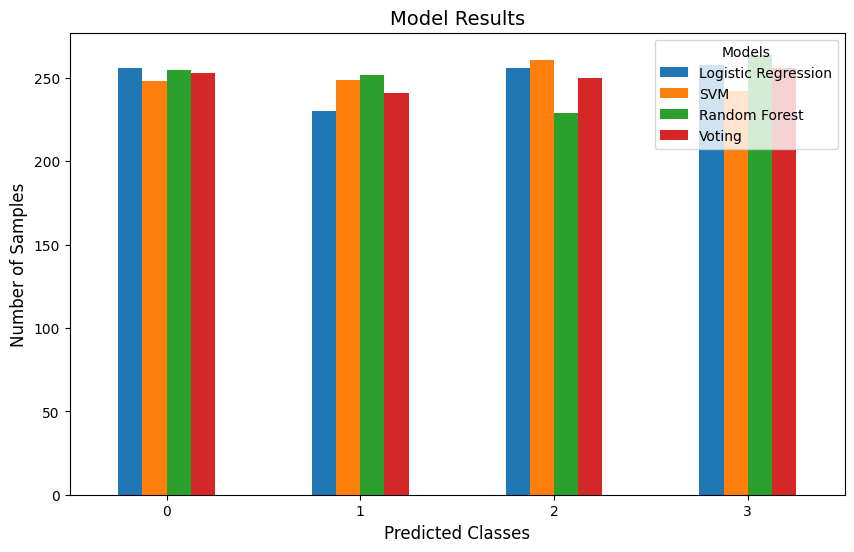

In [ ]:
results = pd.DataFrame({
    "Logistic Regression": df_test["Predict_LR"].value_counts().sort_index(),
    "SVM": df_test["Predict_SVM"].value_counts().sort_index(),
    "Random Forest": df_test["Predict_RF"].value_counts().sort_index(),
    "Voting": df_test["Predict_Vote"].value_counts().sort_index()
})

results.plot(kind="bar", figsize=(10,6))
plt.title("Model Results", fontsize=14)
plt.xlabel("Predicted Classes", fontsize=12)
plt.ylabel("Number of Samples", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Models")
plt.show()

#با توجه به تحلیل اکسل به دست امده و پیش بینی های انجام شده توسط مدل ها نمودار رسم شده می توان نتیجه گرفت

#رگرسیون  لجستیک تقریبا همه کلاس ها رو به صورت یکسان پیش بینی کرده اما ماشین بردار پشتیبان کمی  به سمت کلاس دوم تمایل دارد و در جنگل تصادف بیش تر تمایل به کلاس سوم هست

# و در نهایت در پیش بینی با رای گیری تعادل خوبی بین همه کلاس ها بر قرار شده

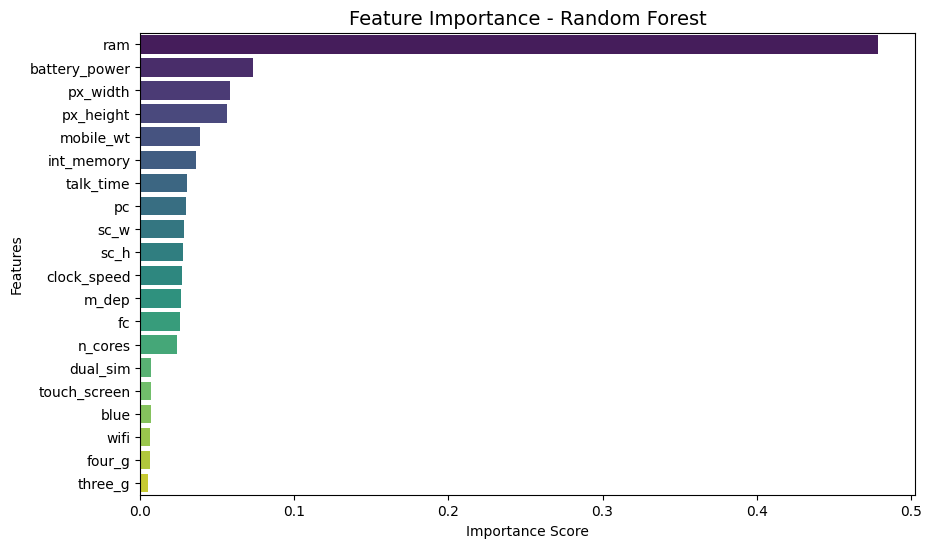

In [ ]:
rf = RandomForestClassifier(n_estimators=200, max_depth=15, random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
features = X_train.columns


indices = importances.argsort()[::-1]
sorted_features = features[indices]
sorted_importances = importances[indices]


plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importances, y=sorted_features, hue=sorted_features,
            dodge=False, palette="viridis", legend=False)
plt.title("Feature Importance - Random Forest", fontsize=14)
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

#با استفاده از جنگل تصادف که یکی از بهترین الگوریتم هایی است که به کمک ان می توان فهمید کدام ویژگی مهم تر است تا بتوان به تیم بازاریابی گفت کدوم ویژگی بیشترین تاثیر رو قیمت داره

# با توجه به نمودار می توان فهمید که رم بیش ترین تاثیر رو روی قیمت موبایل می گذارد و در رتبه دوم  قدرت باتری روی قیمت تاثیر گذار است